In [1]:
import tensorflow as tf
from PIL import Image
import torchvision.transforms as transforms

C:\Users\yeruk\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model1=tf.keras.models.load_model("./riceimagecnn.h5")
classes=[
    "Arborio",
    "Basmati",
    "Lpsala",
    "Jasmine",
    "Karacadag"
]
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 9)         252       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 9)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 36)          5868      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 36)        

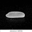

In [3]:
img=Image.open("./rice12.jpg")

img=img.resize((32,32))
img

In [4]:
transform=transforms.Compose([transforms.PILToTensor()])
img_tensor=transform(img)
img_tensor=tf.divide(img_tensor,255)
img_tensor=tf.reshape(img_tensor,(-1,32,32,3))
preds=model1.predict(img_tensor,verbose=False)[0]*100
print(preds)

[  0.   0. 100.   0.   0.]


In [5]:
confidence=tf.reduce_max(preds)
index=int(tf.where(preds==confidence)[0][0])
print(index)

2


In [6]:
preds=classes[index]

In [7]:
print(preds.title(),int(confidence),'%')

Lpsala 100 %
